## 知識情報学第9回演習サンプルプログラム ex9.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Modified by Wasin Kalintha and Ekasit Phermphoonphiphat
- Checked with Python 3.9.7, scikit-learn 1.1
- Last updated: 2017/12/10
- MIT License

## K-means法によるWineデータのクラスタリング

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# scikit-learnのデータセットからwineデータを読み込み
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# 2次元に限定
d1 = 0
d2 = 1
X = scale(wine.data[:, [d1, d2]])
y = wine.target

### K-meansクラスタリングの実行

In [4]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1)
y_km = km.fit_predict(X)

### 割り当てられたクラスタによりクラスタリング結果を描画

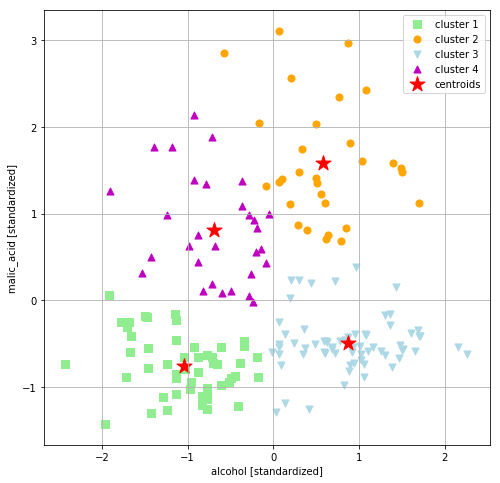

In [5]:
# 描画に使用する色とマークのセット
colors = (["lightgreen", "orange", "lightblue", "m", "b", "g", "c", "y", "w", "k"])
markers = (["s", "o", "v", "^", "D", ">", "<", "d", "p", "H"])

plt.figure(figsize=(8,8))
for idx in range(0, km.cluster_centers_.shape[0]):
    plt.scatter(X[y_km == idx, 0],
                X[y_km == idx, 1],
                s=50,
                c=colors[idx],
                marker=markers[idx],
                label="cluster " + str(idx+1))

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.xlabel(wine.feature_names[d1]+' [standardized]')
plt.ylabel(wine.feature_names[d2]+' [standardized]')
plt.legend()
plt.grid()

### クラスとクラスタ中心を描画

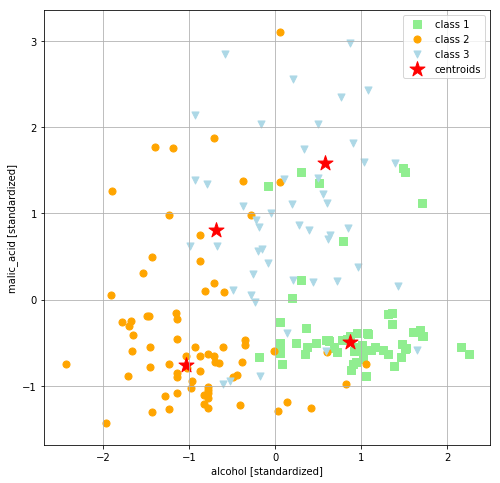

In [6]:
plt.figure(figsize=(8,8))
for idx in range(0, len(wine.target_names)):
    plt.scatter(X[y == idx, 0],
                X[y == idx, 1],
                s=50,
                c=colors[idx],
                marker=markers[idx],
                label="class " + str(idx+1))

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.xlabel(wine.feature_names[d1]+' [standardized]')
plt.ylabel(wine.feature_names[d2]+' [standardized]')
plt.legend()
plt.grid()

### 【課題1】クラスタ数を変えたときの内部基準SSEをグラフにプロット
- ヒント：SSEは，KMeansクラスのinertia_に格納されている．
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [ ]:
sse = []
k_start , k_end = 1 , 11
plt.figure(figsize=(8,8))

for k in range(k_start, k_end):
    
    [YOUR CODE HERE]
    
plt.plot(range(k_start, k_end), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### 【課題2】クラスタ数を変えたときの外部基準Purityをグラフにプロット
- ただし，Purityはscikit-learnに実装されていない.
- ヒント：class-cluster混同行列を作成すると良い．

In [ ]:
# K-meansクラスタリングのインスタンスを受け取って，Purityを返す関数
def cal_purity(km):
    
    [YOUR CODE HERE]
    
    return purity

In [ ]:
# cal_purity()を使用して課題1同様にグラフをプロット
[YOUR CODE HERE]